In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## Function to load tweets along with their label and id
def load_data(path):
  return pd.read_csv(path)[["id","tweets","label"]]

In [2]:
## Load the preprocessed tweets
tweets=load_data("https://0f41bdd6-d0a9-458e-937c-838e849bb6f4.usrfiles.com/ugd/0f41bd_520705b60d3149cf990572133108dffc.csv")

In [3]:
## Split into train and test, 80:20 split used
X_train_tweets, X_test_tweets, y_train, y_test = train_test_split(tweets[['id','tweets']], tweets[['id','label']], test_size=0.2, shuffle=False)

Data Analysis
Reference: http://webcache.googleusercontent.com/search?q=cache:ljoMp5THdW8J:https://towardsdatascience.com/exploratory-data-analysis-for-natural-language-processing-ff0046ab3571&client=ubuntu&hl=en&gl=in&strip=1&vwsrc=0

In [4]:
crit_tweets=X_train_tweets.iloc[y_train.index[y_train['label'] == 1].tolist()]
tweets=crit_tweets

In [5]:
print("In the training set")
print("Total No of tweets:",len(y_train))
print("No of critical tweets:",sum(y_train['label']))
print("No of non-critical tweets:",len(y_train)-sum(y_train['label']))

print("\nIn the test set")
print("Total No of tweets:",len(y_test))
print("No of critical tweets:",sum(y_test['label']))
print("No of non-critical tweets:",len(y_test)-sum(y_test['label']))

In the training set
Total No of tweets: 13904
No of critical tweets: 3143
No of non-critical tweets: 10761

In the test set
Total No of tweets: 3476
No of critical tweets: 1494
No of non-critical tweets: 1982


<AxesSubplot:>

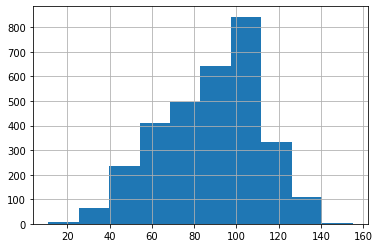

In [6]:
# Length of Tweets
only_tweets=tweets['tweets']
only_tweets.str.len().hist()
# following data tells a tweet is generally 95-100 words

<AxesSubplot:>

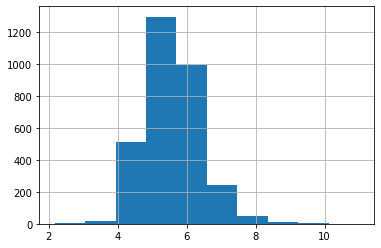

In [7]:
# Average word length in a tweet
only_tweets.astype(str).str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

# Mostly a word length is 5-6 letters

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<BarContainer object of 15 artists>

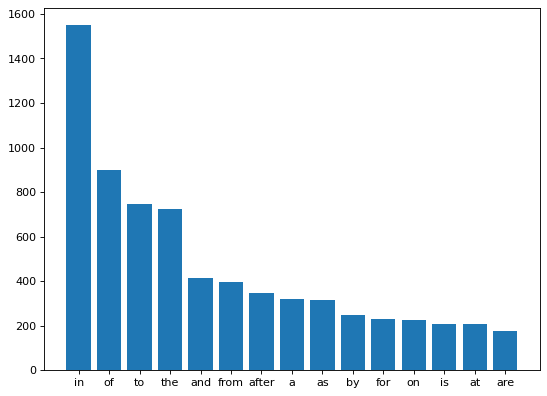

In [8]:
import nltk
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80) # Change Figure size Ref: https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
nltk.download('stopwords')
stopwords=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
stop=set(stopwords)
corpus=[]
new= only_tweets.astype(str).str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:15] # Will get top 15 words, change 15 to something else to see more stop words count
x,y=zip(*top)
plt.bar(x,y)
#Following graph shows top stop words with their count in corpus

<AxesSubplot:>

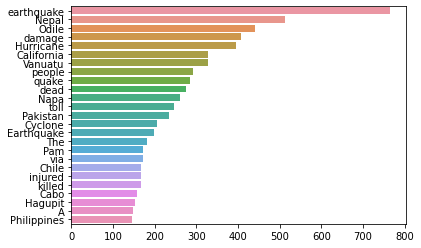

In [9]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter
counter=Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)
# Following shows the non stop words that occur frequently in entire corpus

<AxesSubplot:>

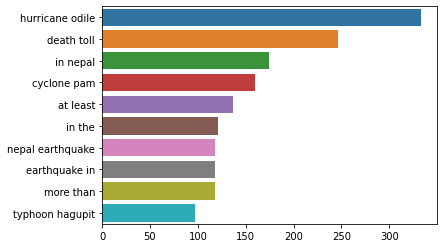

In [10]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]
top_n_bigrams=get_top_ngram(only_tweets.astype(str),2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
# Following shows the top occuring bigrams

<AxesSubplot:>

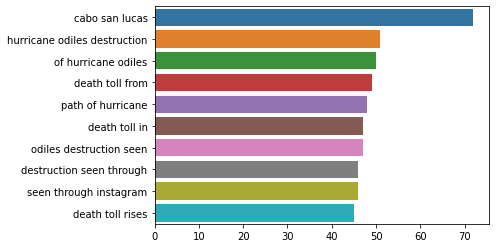

In [11]:
top_tri_grams=get_top_ngram(only_tweets.astype(str),n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)
# Following shows top occuring trigrams

Topic Modeling exploration with pyLDAvis

In [12]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
import nltk
import gensim
nltk.download('punkt')
nltk.download('wordnet')
def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in df:
        words=[w for w in word_tokenize(news) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus
corpus=preprocess_news(only_tweets.astype(str))
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[(0,
  '0.022*"California" + 0.018*"Napa" + 0.017*"earthquake" + 0.014*"quake" + 0.013*"Hurricane" + 0.012*"damage" + 0.010*"Nepal" + 0.009*"Odile" + 0.007*"via" + 0.007*"Damage"'),
 (1,
  '0.030*"Odile" + 0.027*"damage" + 0.023*"Hurricane" + 0.020*"Vanuatu" + 0.015*"Cyclone" + 0.014*"Baja" + 0.012*"Pam" + 0.011*"California" + 0.009*"Cabo" + 0.009*"destruction"'),
 (2,
  '0.029*"earthquake" + 0.015*"Pakistan" + 0.015*"Nepal" + 0.012*"toll" + 0.011*"Death" + 0.011*"dead" + 0.008*"Odile" + 0.007*"Hagupit" + 0.007*"rise" + 0.007*"people"'),
 (3,
  '0.027*"earthquake" + 0.021*"Nepal" + 0.014*"death" + 0.013*"toll" + 0.012*"people" + 0.012*"Vanuatu" + 0.012*"Chile" + 0.010*"quake" + 0.010*"dead" + 0.009*"The"')]

In [13]:
# # If you encounter any error in this cell  uncomment following 3 lines
# !pip install pyLDAvis
# !pip install pandas --upgrade
# !pip install matplotlib --upgrade
import pyLDAvis
import pyLDAvis.sklearn
import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
vis

# On the left side, the area of each circle represents the importance of the topic relative to the corpus. As there are four topics, we have four circles.

#     The distance between the center of the circles indicates the similarity between the topics. Here you can see that the topic 3 and topic 4 overlap, this indicates that the topics are more similar.
    # On the right side, the histogram of each topic shows the top 30 relevant words. For example, in topic 1 the most relevant words are police, new, may, war, etc

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.083361  0.064273       1        1  30.476878
0     -0.032602 -0.129893       2        1  25.995771
2      0.083140 -0.003714       3        1  22.044121
1     -0.133899  0.069335       4        1  21.483229, topic_info=            Term        Freq       Total Category  logprob  loglift
134   California  274.000000  274.000000  Default  30.0000  30.0000
4372       Odile  369.000000  369.000000  Default  29.0000  29.0000
5695     Vanuatu  277.000000  277.000000  Default  28.0000  28.0000
48          toll  205.000000  205.000000  Default  27.0000  27.0000
4432     Cyclone  174.000000  174.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
6     earthquake   48.929264  643.735799   Topic4  -4.9304  -1.0390
29         Nepal   38.971391  429.242673   Topic4  -5.1580  -0.8613
44           via   29.150276  142.856088   Topic4  -5.4483  -0.0515
35        people   25.642539  245.999689   Topic4  -5.5765  -0.7232
1           Napa   25.027724  217.700111   Topic4  -5.6008  -0.6252

[299 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
227       3  0.984172        ABC
1124      1  0.884240        AFP
2715      1  0.837085        Aid
2715      3  0.139514        Aid
2838      4  0.847537  Australia
...     ...       ...        ...
226       3  0.078033       wine
226       4  0.078033       wine
216       2  0.974735     winery
5703      4  0.947564      wiped
2628      2  0.933203     wreaks

[492 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

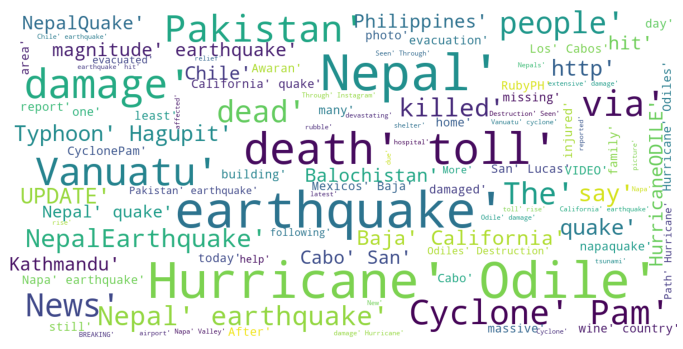

In [14]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))    
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(corpus)

Sentiment Analysis-TextBlob

<AxesSubplot:>

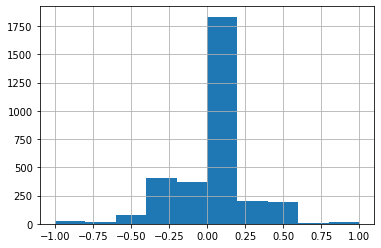

In [15]:
from textblob import TextBlob
def polarity(text):
    return TextBlob(text).sentiment.polarity
polarity_scores=only_tweets.astype(str).\
    apply(lambda x : polarity(x))
polarity_scores.hist()

<BarContainer object of 3 artists>

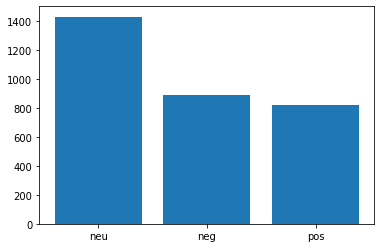

In [16]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
crisis_polarity=polarity_scores.\
   map(lambda x: sentiment(x))
plt.bar(crisis_polarity.value_counts().index,
        crisis_polarity.value_counts())

# Count of negative, positive and neutral tweets

Vader Sentiment Analysis

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


<BarContainer object of 3 artists>

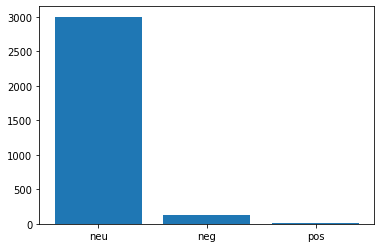

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    #return ss
    return np.argmax(list(ss.values())[:-1])
crisis_polarity=only_tweets.astype(str).\
  map(lambda x: get_vader_score(x))
polarity=crisis_polarity.replace({0:'neg',1:'neu',2:'pos'})
plt.bar(polarity.value_counts().index,
        polarity.value_counts())

# With Vader even more tweets are classified as neutraal

Named Entity Recognition

In [18]:
import spacy
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import MutableMapping, Sequence  # noqa
/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import MutableMapping, Sequence  # noqa
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace,

In [19]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]
ent=only_tweets.astype(str).\
    apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]
counter=Counter(ent)
count=counter.most_common()

<AxesSubplot:>

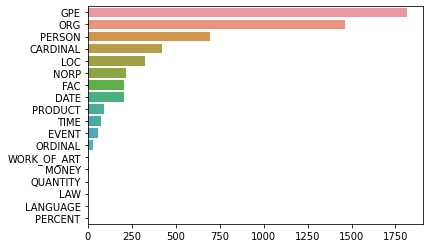

In [20]:
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

# GPE ,ORG, Person, loc are most important named entities entities

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

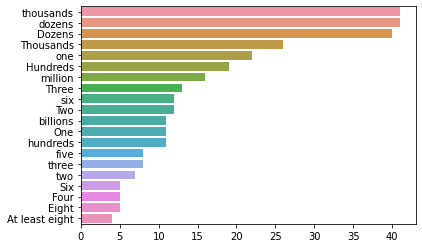

In [21]:
def ner(text,ent="CARDINAL"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]
gpe=only_tweets.astype(str).apply(lambda x: ner(x))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)
x,y=map(list,zip(*counter.most_common(20)))
sns.barplot(y,x)
# Following are the top 10 CARDINALS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

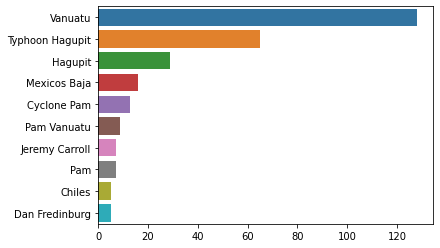

In [22]:
per=only_tweets.astype(str).apply(lambda x: ner(x,"PERSON"))
per=[i for x in per for i in x]
counter=Counter(per)
x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

POS tag exploration

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


<AxesSubplot:>

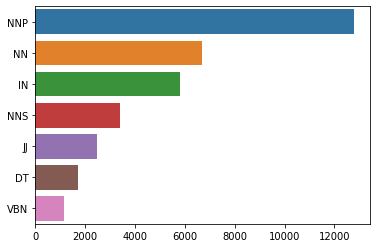

In [23]:
import nltk
nltk.download('averaged_perceptron_tagger')
def pos(text):
    pos=nltk.pos_tag(word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos
tags=only_tweets.astype(str).apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)
x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)
# Following are the most common POS Tags

<AxesSubplot:>

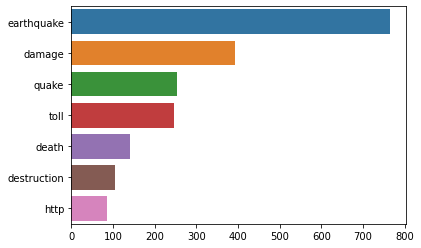

In [25]:
def get_adjs(text):
    adj=[]
    pos=nltk.pos_tag(word_tokenize(text))
    for word,tag in pos:
        if tag=='NN':
            adj.append(word)
    return adj
words=only_tweets.astype(str).apply(lambda x : get_adjs(x))
words=[x for l in words for x in l]
counter=Counter(words)
x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)
# Following are most common nouns

Readability Index
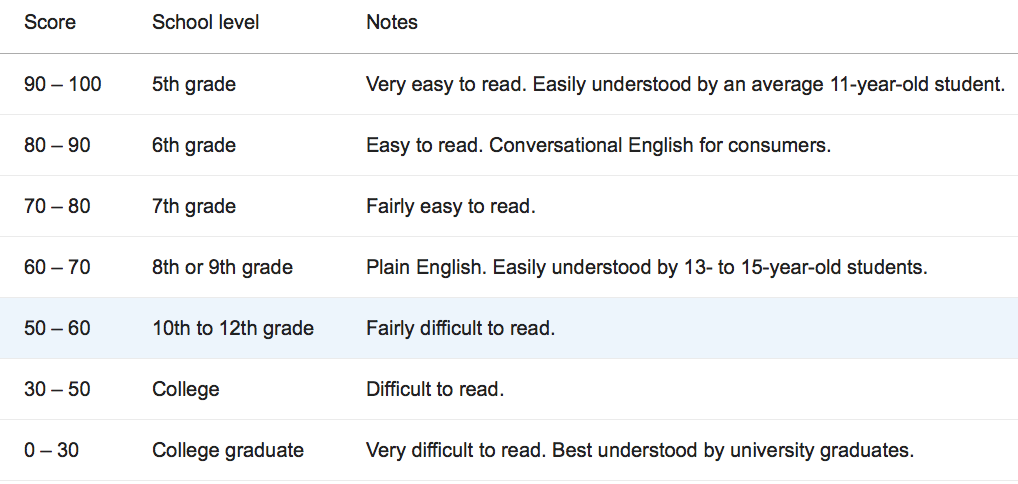

     |████████████████████████████████| 101 kB 7.0 MB/s 
     |████████████████████████████████| 2.0 MB 99.8 MB/s 


<AxesSubplot:>

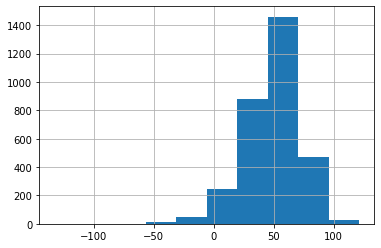

In [26]:
!pip install textstat
from textstat import flesch_reading_ease
only_tweets.astype(str).\
   apply(lambda x : flesch_reading_ease(x)).hist()

After Preprocessing

https://colab.research.google.com/drive/1g52XzDRRCwjculKC1g_JG6_seDzQ4X5S?usp=sharing